# Jordan Bird

## Research question/interests

Coming from a health sciences background, I’m interested in looking at a couple of different angles of this dataset:

I am interested in looking at the trends of cardiovascular disease (i.e., atrial fibrillation, heart failure, hypertension, ischemia heart disease, stroke or TIA) in the five US regions (i.e., West, Midwest, Southwest, Southeast, Northeast) and how it has changed over the 6 years of 2006-2012. This is the first step before correlating it to utilization of Medicare and Medicaid services to determine what percentage of the overall healthcare system is from cardiovascular disease. Hopefully we will be able to pinpoint areas of higher cardiovascular risk and tie it into historical census data for why higher cardiovascular disease rates may be higher in some areas of the country.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions1 as p1

## Data Cleaning

In [2]:
#p1.connecting_unprocessed('../data/raw/group36_MedicareData.xlsx')
dfu = p1.unprocessed('../data/raw/data.csv')

#### Data Cleaning - Adding State Region column

In [3]:
dfu = p1.add_region_column(dfu)

#### Data Cleaning - Renaming columns

In [4]:
dfu = p1.rename_data(dfu)

#### Data Cleaning - Remove columns

In [5]:
dfu = p1.remove_columns(dfu)

#### Data Cleaning - Replace missing values with NaN

In [6]:
dfu = p1.missing_values(dfu)

#### Data Cleaning - Write .csv file to processed data folder

In [7]:
dfu.to_csv('../data/processed/c_data.csv', sep=',', na_rep='', index=False)

## Process Data

In [3]:
dfc = p1.cleaned_data('../data/processed/c_data.csv')

## Exploratory Data Analysis

In [4]:
print("Number of rows and columns respectively:", dfc.shape)
print("Columns in the dataset:", dfc.columns)

Number of rows and columns respectively: (1456, 52)
Columns in the dataset: Index(['Year', 'State', 'Region',
       'Number of People by Medicare-Medicaid Enrollment Type',
       'Number of People', 'Number of People with FFS',
       'Number of Females with FFS', 'Number of Males with FFS', 'A%_<40',
       'A%_40-64', 'A%_65-84', 'A%_85+', 'F%', 'M%', 'White%', 'AfrA%', 'His%',
       'Asian%', 'Indig%', 'Unknown%', 'ha%', 'af%', 'hf%', 'dm%', 'hc%',
       'hyp%', 'ihd%', 'strokeorTIA%', 'obesity%', 'pad%',
       'Number of FFS people who used Medicare procedures',
       'Number of FFS people who used Medicare imaging services',
       'Number of FFS people who used Medicare laboratory/testing services',
       'Number of FFS people who used Medicare durable medical equipment',
       'Number of people who used Medicare Part D prescription drugs',
       'Total Medicare payments', 'Total Medicare IP Hospital FFS payments',
       'Total Medicare Other IP Hospital FFS payments',


#### Cardiovascular Variable Summary

In [5]:
dfc[['ha%', 'af%', 'hf%', 'dm%', 'hc%', 'hyp%', 'ihd%', 'strokeorTIA%', 'obesity%', 'pad%']].describe().T

,count,mean,std,min,25%,50%,75%,max
ha%,1385.0,0.007931,0.002966,0.0001,0.006000,0.00820,0.009900,0.0209
af%,1436.0,0.047214,0.027135,0.0005,0.022125,0.05060,0.068425,0.1120
hf%,1446.0,0.133520,0.066907,0.0016,0.079400,0.13100,0.172000,0.3080
dm%,1456.0,0.229867,0.084025,0.0028,0.167000,0.24000,0.290000,0.4240
hc%,1444.0,0.269867,0.139578,0.0026,0.153000,0.29350,0.371000,0.6210
hyp%,1454.0,0.404431,0.169476,0.0008,0.248250,0.44900,0.548000,0.6710
ihd%,1450.0,0.211881,0.098325,0.0021,0.121000,0.23000,0.285000,0.4290
strokeorTIA%,1434.0,0.034349,0.018263,0.0030,0.021400,0.03100,0.041275,0.0984
obesity%,1446.0,0.065914,0.031175,0.0009,0.040325,0.06120,0.087075,0.1800
pad%,1440.0,0.084013,0.059851,0.0005,0.035700,0.07525,0.111000,0.3130


#### Analysis:
- The most amount of data is missing from heart attacks (presumably from passing away) while also occuring in the lowest persent of the population (0.79%).
- The most common cardiovascular issue is hypertension at 40.4% of this Medicare/Medicaid population
- In one row of data, 42.4% of the population came in with Diabetes Mellitus. That's a huge percent of any population but very insane in this case.
- As Peripheral Arterial Disease (PAD) is often a subset of Type 2 Diabetes Mellitus cases, it makes sense that in average cases, that PAD occurs in a lower percent of the population

#### Age and Ethnicity Summary

In [6]:
dfc[["A%_<40", "A%_40-64", "A%_65-84", "A%_85+", "F%", "M%", "White%", "AfrA%","His%","Asian%","Indig%","Unknown%"]].describe().T

,count,mean,std,min,25%,50%,75%,max
A%_<40,1448.0,0.180732,0.214602,0.0047,0.015000,0.08520,0.31775,0.728
A%_40-64,1448.0,0.305538,0.141785,0.0305,0.169000,0.33400,0.40825,0.675
A%_65-84,1092.0,0.564909,0.161310,0.2690,0.429000,0.52100,0.76100,0.833
A%_85+,1092.0,0.120036,0.043542,0.0359,0.087375,0.12300,0.14800,0.278
F%,1456.0,0.562986,0.057026,0.4350,0.517000,0.55500,0.61200,0.697
M%,1456.0,0.437014,0.057026,0.3030,0.388000,0.44500,0.48300,0.565
White%,1456.0,0.685083,0.222943,0.0069,0.510500,0.74750,0.86500,0.985
AfrA%,1437.0,0.159678,0.171398,0.0014,0.026200,0.09590,0.22000,0.897
His%,1381.0,0.030176,0.079633,0.0002,0.005200,0.01070,0.02210,0.609
Asian%,1403.0,0.063231,0.092205,0.0001,0.009000,0.02310,0.07525,0.521


#### Analysis
- For age categories, the mean percentage for age categories is >100% based on missing data from the 65-84 and 85+ groupings. This would most likely arise from Medicare not having this information for the 65+ crowd
- Of the data that is present, the majority is still skewed towards 65+ suggesting that there is a greater reliance that falls under Medicare than Medicaid.
- Women were more often enrolled (56.3%) presumably because there are a greater number of women alive, life expectancy is longer, and generally incomes are less which might make more women eligble for Medicaid.
- Not much can be gleaned from the ethnicity as this is not normalized to ethnicity population size year over year. To be able to get a true estimate, it would involve taking total participants and multiplying by ethnic percentage to get a total number of people enrolled in Medicare/Medicaid then dividing total number of people by the yearly national census numbers when controlling for ethnicity.

## Exploratory Data Analysis using National Averages and Year Trends

In [108]:
sns.set(style='darkgrid')

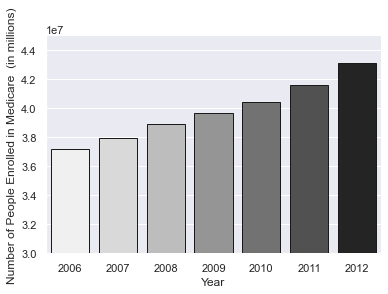

In [109]:
df_nation = dfc.loc[(dfc['State'] == 'National') & (dfc['Number of People by Medicare-Medicaid Enrollment Type'] == 'Medicare Only')]

fig, ax = plt.subplots()
sns.barplot(x='Year', y='Number of People', data=df_nation, palette='Greys', linewidth=1, edgecolor="k")
ax.set(ylim=(3e7,4.5e7), ylabel="Number of People Enrolled in Medicare  (in millions)")
sns.despine(bottom=True)

- Usage of Medicare increased by ~600,000 over the course of the 6 year period (rate increase of ~100,000/year)

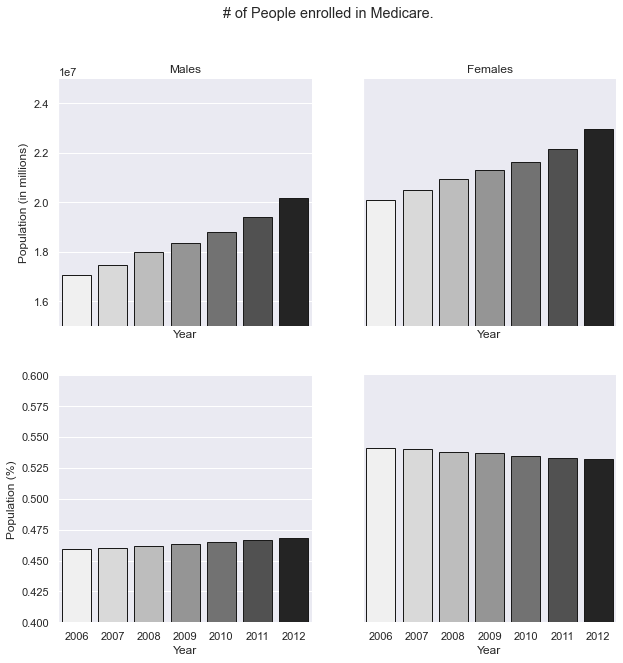

In [142]:
fig, ax = plt.subplots(2,2, sharex=True, figsize=(10,10))
num_males, num_females = df_nation['M%'] * df_nation['Number of People'], df_nation['F%'] * df_nation['Number of People']

fig.suptitle('# of People enrolled in Medicare.')

#Top Graphs
sns.barplot(ax=ax[0,0], x='Year', y=num_males, data=df_nation, palette='Greys', linewidth=1, edgecolor="k")
sns.barplot(ax=ax[0,1], x='Year', y=num_females, data=df_nation, palette='Greys', linewidth=1, edgecolor="k")

#Bottom Graphs
sns.barplot(ax=ax[1,0], x='Year', y='M%', data=df_nation, palette='Greys', linewidth=1, edgecolor="k")
sns.barplot(ax=ax[1,1], x='Year', y='F%', data=df_nation, palette='Greys', linewidth=1, edgecolor="k")

ax[0,0].set_title('Males')
ax[0,1].set_title('Females')
ax[0,0].set(ylim=(1e7,2.5e7), ylabel="Population (in millions)")
ax[1,0].set(ylim=(0,1), ylabel="Population (%)")

top_bounds, bottom_bounds = [1.5e7, 2.5e7], [0.4,0.6]
ax[0,0].set_ylim(top_bounds)
ax[0,1].set_ylim(top_bounds)
ax[1,0].set_ylim(bottom_bounds)
ax[1,1].set_ylim(bottom_bounds)

ax[0,1].get_yaxis().set_visible(False)
ax[1,1].get_yaxis().set_visible(False)

sns.despine(bottom=True)

plt.savefig('../images/Sex_Trends.png', dpi=300)

- While there was an increase in both males and females enrolled in Medicare, the ratio of males to females trended towards converging in the near future.
- This data is not particularly useful  as the net change for women and the net change for men is very different as they had similar enrollment increases for both sexes but the percentages differ based on a different starting baseline (1.7m vs 2m in 2006)

In [144]:
df_nation

,Year,State,Region,Number of People by Medicare-Medicaid Enrollment Type,Number of People,Number of People with FFS,Number of Females with FFS,Number of Males with FFS,A%_<40,A%_40-64,...,Total Medicare Part D prescription drug FFS costs (total RX cost),Number of FFS people who used Medicaid lab/xray services,Number of FFS people who used Medicaid durable medical equipment services,Number of FFS people who used Medicaid drugs,Number of FFS people who used Medicaid clinic services,Total Medicaid FFS payments,Total Medicaid lab/xray FFS payments,Total Medicaid durable medical equipment FFS payments,Total Medicaid drug FFS payments,Total Medicaid clinic payments
2,2006,National,NaN,Medicare Only,37165285,28517682,15573890,12943789,0.0101,0.1020,...,1.406554e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,2007,National,NaN,Medicare Only,37943550,27683059,15074893,12608164,0.0097,0.1020,...,1.827192e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,2008,National,NaN,Medicare Only,38888919,27307254,14818887,12488365,0.0094,0.1020,...,2.019749e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
626,2009,National,NaN,Medicare Only,39644709,26992818,14602995,12389819,0.0090,0.1010,...,2.168458e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
834,2010,National,NaN,Medicare Only,40430007,27186475,14656023,12530442,0.0089,0.1020,...,2.296231e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,2011,National,NaN,Medicare Only,41586093,24838185,13450919,11387260,0.0087,0.1010,...,2.491085e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1250,2012,National,NaN,Medicare Only,43143977,25090451,13545173,11545273,0.0086,0.0992,...,2.729650e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_west = dfc.loc[(dfc['Region'] == 'West') & (dfc['Year'] == 2006)]

C:\Users\Jordan\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hf%'>

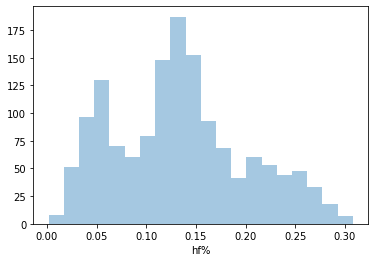

In [22]:
sns.distplot(dfc['hf%'], kde=False, bins=20)

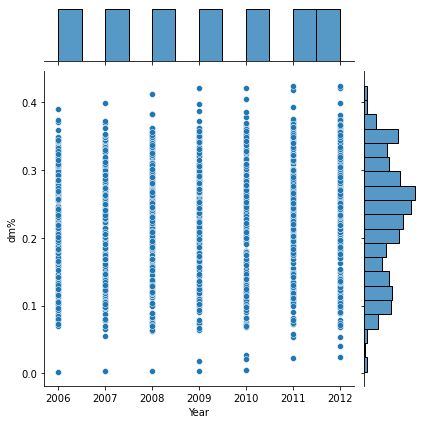

In [30]:
sns.jointplot(x='Year', y='dm%', data=dfc)

## Code Shrapnel

In [ ]:
df.loc[(df['Year'] == 2006) & (df['State'] == 'CA')]
c_df.loc[c_df['Region'] == 'West']


## Creating dataframes based on the year of the Medicare data
df1 = pd.read_excel('../data/raw/group36_MedicareData.xlsx', sheet_name='PUF_2006', header=1)
df2 = pd.read_excel('../data/raw/group36_MedicareData.xlsx', sheet_name='PUF_2007', header=1)
df3 = pd.read_excel('../data/raw/group36_MedicareData.xlsx', sheet_name='PUF_2008', header=1)
df4 = pd.read_excel('../data/raw/group36_MedicareData.xlsx', sheet_name='PUF_2009', header=1)
df5 = pd.read_excel('../data/raw/group36_MedicareData.xlsx', sheet_name='PUF_2010', header=1)
df6 = pd.read_excel('../data/raw/group36_MedicareData.xlsx', sheet_name='PUF_2011', header=1)
df7 = pd.read_excel('../data/raw/group36_MedicareData.xlsx', sheet_name='PUF_2012', header=1)

## Creating an index column based on the year of the Medicare data
df1['Year'] = 2006
df2['Year'] = 2007
df3['Year'] = 2008
df4['Year'] = 2009
df5['Year'] = 2010
df6['Year'] = 2011
df7['Year'] = 2012

## Concatenating dataframes together to be read as a single sheet
frames = [df1, df2, df3, df4, df5, df6, df7]
data = pd.concat(frames)

#Rearrange columns in dataframe such that year because first column
cols = list(data.columns)
cols = [cols[-1]] + cols [:-1]
df = data[cols]


c_df = c_df.rename(columns={"Percent of people who have had a heart attack" : "heartattack%", "Percent of people with atrial fibrillation" : "af%", "Percent of people with heart failure" : "hf%", \
                     "Percent of people with diabetes" : "dm%", "Percent of people with high cholesterol" : "hc%", "Percent of people with hypertension" : "hyp%", \
                     "Percent of people with ischemic heart disease" : "ihd%", "Percent of people with stroke or TIA" : "strokeorTIA%", "Percent of people with obesity" : "obesity%", \
                     "Percent of people with peripheral vascular disease" : "pad%"})

c_df = dfu[["State", "Number of People by Medicare-Medicaid Enrollment Type", "Number of People", "Number of People with FFS", "Number of Females with FFS", "Number of Males with FFS", \
                "Percent under 40 Years", "Percent between 40-64 Years", "Percent between 65-84 Years", "Percent 85+ Years", "Percent Female", "Percent Male", "Percent Non-Hispanic White", \
                "Percent African American", "Percent Hispanic", "Percent Asian or Pacific Islander", "Percent American Indian or Alaska Native", "Percent Other or Unknown Race", \
                "Percent of people who have had a heart attack", "Percent of people with atrial fibrillation", "Percent of people with heart failure", "Percent of people with diabetes", \
                "Percent of people with high cholesterol", "Percent of people with hypertension", "Percent of people with ischemic heart disease", "Percent of people with stroke or TIA", \
                "Percent of people with obesity", "Percent of people with peripheral vascular disease", "Number of FFS people who used Medicare procedures", \
                "Number of FFS people who used Medicare imaging services", "Number of FFS people who used Medicare laboratory/testing services", "Number of FFS people who used Medicare durable medical equipment", \
                "Number of people who used Medicare Part D prescription drugs", "Total Medicare payments", "Total Medicare IP Hospital FFS payments", "Total Medicare Other IP Hospital FFS payments", \
                "Total Medicare Part B drug FFS payments", "Total Medicare procedure FFS payments", "Total Medicare imaging FFS payments", "Total Medicare durable medical equipment FFS payments", \
                "Total Medicare Part D prescription drug FFS costs (total RX cost)", "Number of FFS people who used Medicaid lab/xray services", "Number of FFS people who used Medicaid durable medical equipment services", \
                "Number of FFS people who used Medicaid drugs", "Number of FFS people who used Medicaid clinic services", "Total Medicaid FFS payments", "Total Medicaid lab/xray FFS payments", \
                "Total Medicaid durable medical equipment FFS payments", "Total Medicaid drug FFS payments", "Total Medicaid clinic payments"]]

##Grouping US States by Region
#Midwest US Region
c_df.loc[(c_df['State'] == 'ND') | (c_df['State'] == 'SD') | (c_df['State'] == 'NE') | (c_df['State'] == 'KS') | (c_df['State'] == 'MN') | (c_df['State'] == 'IA') | (c_df['State'] == 'MO') | (c_df['State'] == 'WI') | (c_df['State'] == 'IL') | (c_df['State'] == 'MI') | (c_df['State'] == 'IN') | (c_df['State'] == 'OH'), 'Region'] = 'Midwest'
#Northeast US Region
c_df.loc[(c_df['State'] == 'ME') | (c_df['State'] == 'DC') | (c_df['State'] == 'DE') | (c_df['State'] == 'VA') |(c_df['State'] == 'NH') | (c_df['State'] == 'VT') | (c_df['State'] == 'MA') | (c_df['State'] == 'RI') | (c_df['State'] == 'CT') | (c_df['State'] == 'NY') | (c_df['State'] == 'PA') | (c_df['State'] == 'NJ'), 'Region'] = 'Northeast'
#Southeast US Region
c_df.loc[(c_df['State'] == 'KY') | (c_df['State'] == 'LA') | (c_df['State'] == 'AR') | (c_df['State'] == 'TN') | (c_df['State'] == 'MS') | (c_df['State'] == 'WV') | (c_df['State'] == 'NC') | (c_df['State'] == 'AL') | (c_df['State'] == 'MD') | (c_df['State'] == 'SC') | (c_df['State'] == 'GA') | (c_df['State'] == 'FL'), 'Region'] = 'Southeast'
#Southwest US Region
c_df.loc[(c_df['State'] == 'AZ') | (c_df['State'] == 'NM') | (c_df['State'] == 'OK') | (c_df['State'] == 'TX'), 'Region'] = 'Southwest'
#West US Region
c_df.loc[(c_df['State'] == 'WA') | (c_df['State'] == 'OR') | (c_df['State'] == 'CA') | (c_df['State'] == 'HI') | (c_df['State'] == 'AK') | (c_df['State'] == 'ID') | (c_df['State'] == 'NV') | (c_df['State'] == 'MT') | (c_df['State'] == 'WY') | (c_df['State'] == 'UT') | (c_df['State'] == 'CO'), 'Region'] = 'West'
#National
c_df.loc[(c_df['State'] == 'National'), 'Region'] = 'NaN'